In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from tqdm import notebook

In [139]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

%matplotlib inline

train = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/parking_data_preprocessing_train_07_19.csv')
test = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/parking_data_preprocessing_test_07_19.csv')
sub = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/sample_submission.csv')
age = pd.read_csv('C:/Users/user/LikeLion_AI/DACON/Parking_demand/CSV/age_gender_info.csv')

train.shape, test.shape, sub.shape, age.shape

((2869, 16), (1022, 15), (150, 2), (16, 23))

In [138]:
train.loc[train['전용면적별세대수']>200, :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
0,C2515,6.302619,1,2,5,3.540379,5.624018,2.890372,0,16.036452,11.325885,0.0,1.386294,6.437752,5.327876,0.0,0,0,1
1,C2515,6.302619,1,2,5,3.703768,4.110874,2.890372,0,16.354905,11.581808,0.0,1.386294,6.437752,5.327876,0.0,0,1,0
2,C2515,6.302619,1,2,5,3.703768,3.044522,2.890372,0,16.354905,11.581808,0.0,1.386294,6.437752,5.327876,0.0,0,1,0
3,C2515,6.302619,1,2,5,3.869116,3.663562,2.890372,0,16.729653,11.916796,0.0,1.386294,6.437752,5.327876,0.0,0,1,0
4,C2515,6.302619,1,2,5,3.869116,2.995732,2.890372,0,16.729653,11.916796,0.0,1.386294,6.437752,5.327876,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,5.480639,1,0,5,3.916015,2.995732,2.079442,0,16.244376,11.662130,0.0,0.693147,5.117994,4.990433,0.0,0,1,0
2865,C2532,5.480639,1,0,5,3.952781,3.555348,2.079442,0,16.454925,11.865770,0.0,0.693147,5.117994,4.990433,0.0,0,1,0
2866,C2532,5.480639,1,0,5,3.965185,3.555348,2.079442,0,16.454925,11.865770,0.0,0.693147,5.117994,4.990433,0.0,0,1,0
2867,C2532,5.480639,1,0,5,3.969537,4.744932,2.079442,0,16.454925,11.865770,0.0,0.693147,5.117994,4.990433,0.0,0,1,0


In [102]:
train['전용면적별세대수(중)'].value_counts()

1.0    1790
0.0    1066
Name: 전용면적별세대수(중), dtype: int64

In [140]:
train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(소)'] = 1
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(소)'] = 0
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(소)'] = 0

train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(중)'] = 0
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(중)'] = 1
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(중)'] = 0

train.loc[train['전용면적별세대수']<=10, '전용면적별세대수(대)'] = 0
train.loc[(train['전용면적별세대수']>10)&(train['전용면적별세대수']<=200), '전용면적별세대수(대)'] = 0
train.loc[train['전용면적별세대수']>200, '전용면적별세대수(대)'] = 1

train['전용면적별세대수(소)'] = train['전용면적별세대수(소)'].astype('int')
train['전용면적별세대수(중)'] = train['전용면적별세대수(중)'].astype('int')
train['전용면적별세대수(대)'] = train['전용면적별세대수(대)'].astype('int')

train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
0,C2515,545,1,2,5,33.48,276,17.0,0,9216000.0,82940.0,0.0,3.0,624.0,205.0,0.0,0,0,1
1,C2515,545,1,2,5,39.60,60,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0,0.0,0,1,0
2,C2515,545,1,2,5,39.60,20,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0,0.0,0,1,0
3,C2515,545,1,2,5,46.90,38,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0,0.0,0,1,0
4,C2515,545,1,2,5,46.90,19,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,1,0,5,49.20,19,7.0,0,11346000.0,116090.0,0.0,1.0,166.0,146.0,0.0,0,1,0
2865,C2532,239,1,0,5,51.08,34,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.0,0,1,0
2866,C2532,239,1,0,5,51.73,34,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.0,0,1,0
2867,C2532,239,1,0,5,51.96,114,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.0,0,1,0


In [141]:
test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(소)'] = 1
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(소)'] = 0
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(소)'] = 0

test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(중)'] = 0
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(중)'] = 1
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(중)'] = 0

test.loc[test['전용면적별세대수']<=10, '전용면적별세대수(대)'] = 0
test.loc[(test['전용면적별세대수']>10)&(test['전용면적별세대수']<=200), '전용면적별세대수(대)'] = 0
test.loc[test['전용면적별세대수']>200, '전용면적별세대수(대)'] = 1

test['전용면적별세대수(소)'] = test['전용면적별세대수(소)'].astype('int')
test['전용면적별세대수(중)'] = test['전용면적별세대수(중)'].astype('int')
test['전용면적별세대수(대)'] = test['전용면적별세대수(대)'].astype('int')

test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
0,C1072,754,1,1,5,39.79,116,14.0,7,2.283000e+07,189840.00000,0.0,2.0,683.0,0.0,0,1,0
1,C1072,754,1,1,5,46.81,30,14.0,0,3.604800e+07,249930.00000,0.0,2.0,683.0,0.0,0,1,0
2,C1072,754,1,1,5,46.90,112,14.0,7,3.604800e+07,249930.00000,0.0,2.0,683.0,0.0,0,1,0
3,C1072,754,1,1,5,46.90,120,14.0,7,3.604800e+07,249930.00000,0.0,2.0,683.0,0.0,0,1,0
4,C1072,754,1,1,5,51.46,60,14.0,7,4.349700e+07,296780.00000,0.0,2.0,683.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,1,2,9,36.77,126,38.0,11,1.749390e+07,143525.26025,0.0,1.0,467.0,5.0,0,1,0
1018,C2189,382,1,12,5,29.19,96,45.0,7,6.872000e+06,106400.00000,0.0,2.0,300.0,4.0,0,1,0
1019,C2189,382,1,12,5,29.19,20,45.0,7,6.872000e+06,106400.00000,0.0,2.0,300.0,4.0,0,1,0
1020,C2189,382,1,12,5,39.45,202,45.0,7,1.341000e+07,144600.00000,0.0,2.0,300.0,4.0,0,0,1


### feature수가 적기 때문에 feature를 어떻게 다듬느냐가 관건
feature의 분포를 출력한 후, 정규분포의 형태로 만들어주기

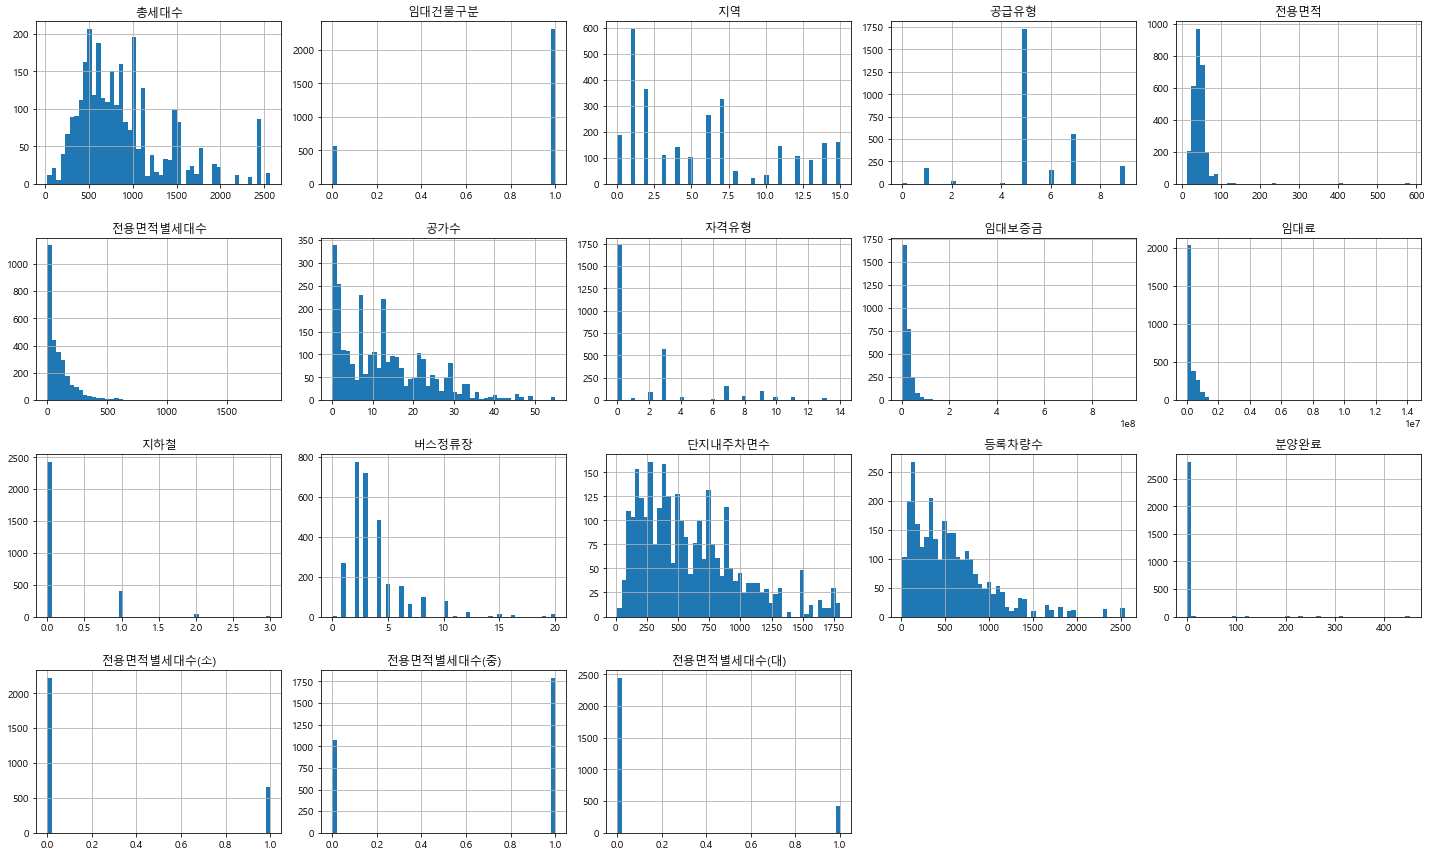

In [112]:
## train
columns = train.columns.drop('단지코드')

ax = [None for _ in range(len(columns))]
plt.figure(figsize=(20,12), facecolor='white')

for idx, col in enumerate(columns):
    ax[idx] = plt.subplot(4, 5, idx+1)
    plt.hist(train[col], bins=50)
    plt.title(col)
    plt.grid()

plt.tight_layout()
plt.show()

총세대수, 전용면적, 전용면적별세대수, 공가수, 임대보증금, 임대료, 버스정류장, 단지내주차면수가 왼쪽으로 skew 형태를 띄고있는 것을 알 수 있음.

그리고 총세대수, 전용면적, 전용면적별세대수, 공가수, 임대보증금, 임대료, 버스정류장, 단지내주차면수, 등록차량수 등이 outlier를 가지고있음.

-> log를 씌우자

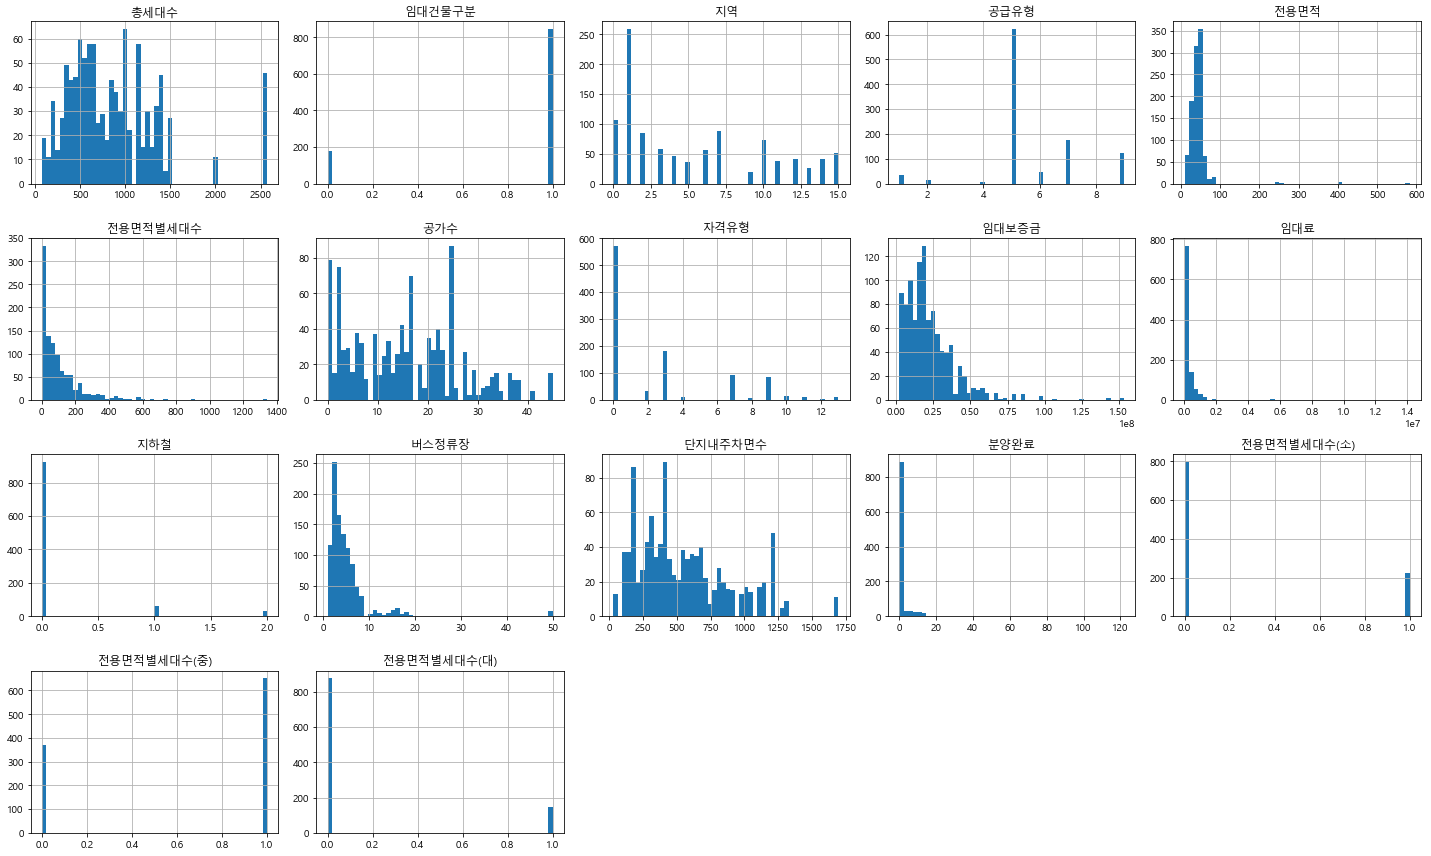

In [114]:
## test
columns = test.columns.drop('단지코드')

ax = [None for _ in range(len(columns))]
plt.figure(figsize=(20,12), facecolor='white')

for idx, col in enumerate(columns):
    ax[idx] = plt.subplot(4, 5, idx+1)
    plt.hist(test[col], bins=50)
    plt.title(col)
    plt.grid()

plt.tight_layout()
plt.show()

In [142]:
log_list = ['총세대수', '전용면적', '전용면적별세대수', '공가수', 
            '임대보증금', '임대료', '버스정류장', '단지내주차면수']

for feature in log_list:
    train[feature] = np.log(train[feature]+1)

In [143]:
log_list = ['총세대수', '전용면적', '전용면적별세대수', '공가수', 
            '임대보증금', '임대료', '버스정류장', '단지내주차면수']

for feature in log_list:
    test[feature] = np.log(test[feature]+1)

In [144]:
train.describe()

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000
mean,6.622306,0.804113,5.695713,5.436389,3.730587,3.655430,2.259928,1.972813,16.679085,12.295055,0.168700,1.435203,6.139121,550.127571,4.304984,0.226908,0.623911,0.149181
std,0.605125,0.396951,4.778035,1.709931,0.365808,1.737521,0.960015,3.083444,0.763623,0.865694,0.419349,0.453809,0.756124,430.465261,32.861200,0.418906,0.484487,0.356329
min,3.295837,0.000000,0.000000,0.000000,2.611539,0.693147,0.000000,0.000000,14.405535,9.720226,0.000000,0.000000,2.639057,13.000000,0.000000,0.000000,0.000000,0.000000
25%,6.244167,1.000000,1.000000,5.000000,3.499533,2.708050,1.609438,0.000000,16.195335,11.695255,0.000000,1.098612,5.627621,209.000000,0.000000,0.000000,0.000000,0.000000
50%,6.654153,1.000000,5.000000,5.000000,3.709662,4.110874,2.484907,0.000000,16.705271,12.133561,0.000000,1.386294,6.216606,479.000000,0.000000,0.000000,1.000000,0.000000
75%,7.008505,1.000000,9.000000,7.000000,3.952205,4.962845,3.044522,3.000000,17.165099,12.804797,0.000000,1.609438,6.700731,761.000000,0.000000,0.000000,1.000000,0.000000
max,7.851272,1.000000,15.000000,9.000000,6.370586,7.531552,4.025352,14.000000,20.659582,16.465620,3.000000,3.044522,7.494986,2550.000000,452.000000,1.000000,1.000000,1.000000


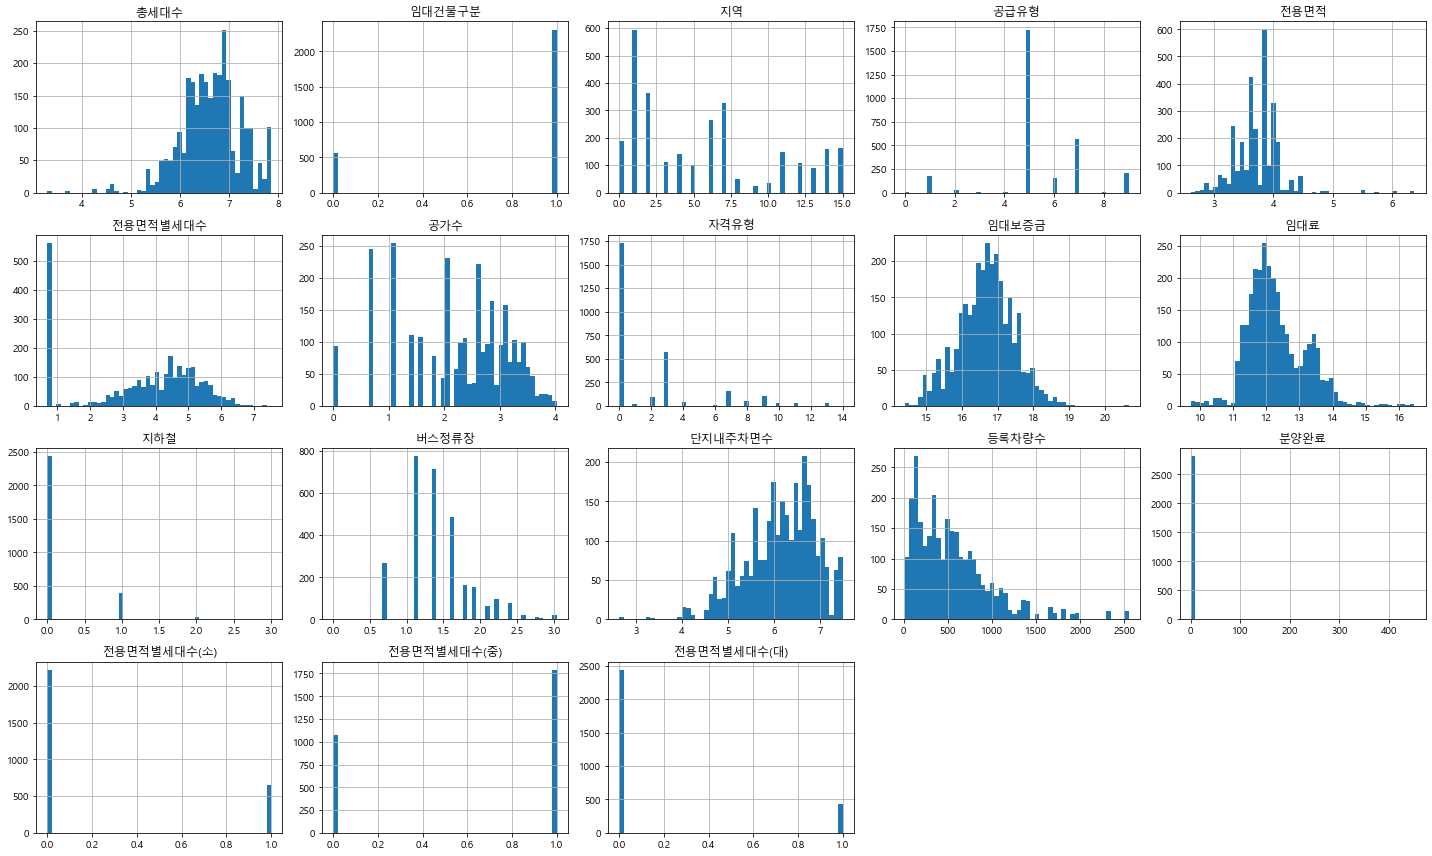

In [145]:
## train
columns = train.columns.drop('단지코드')

ax = [None for _ in range(len(columns))]
plt.figure(figsize=(20,12), facecolor='white')

for idx, col in enumerate(columns):
    ax[idx] = plt.subplot(4, 5, idx+1)
    plt.hist(train[col], bins=50)
    plt.title(col)
    plt.grid()

plt.tight_layout()
plt.show()

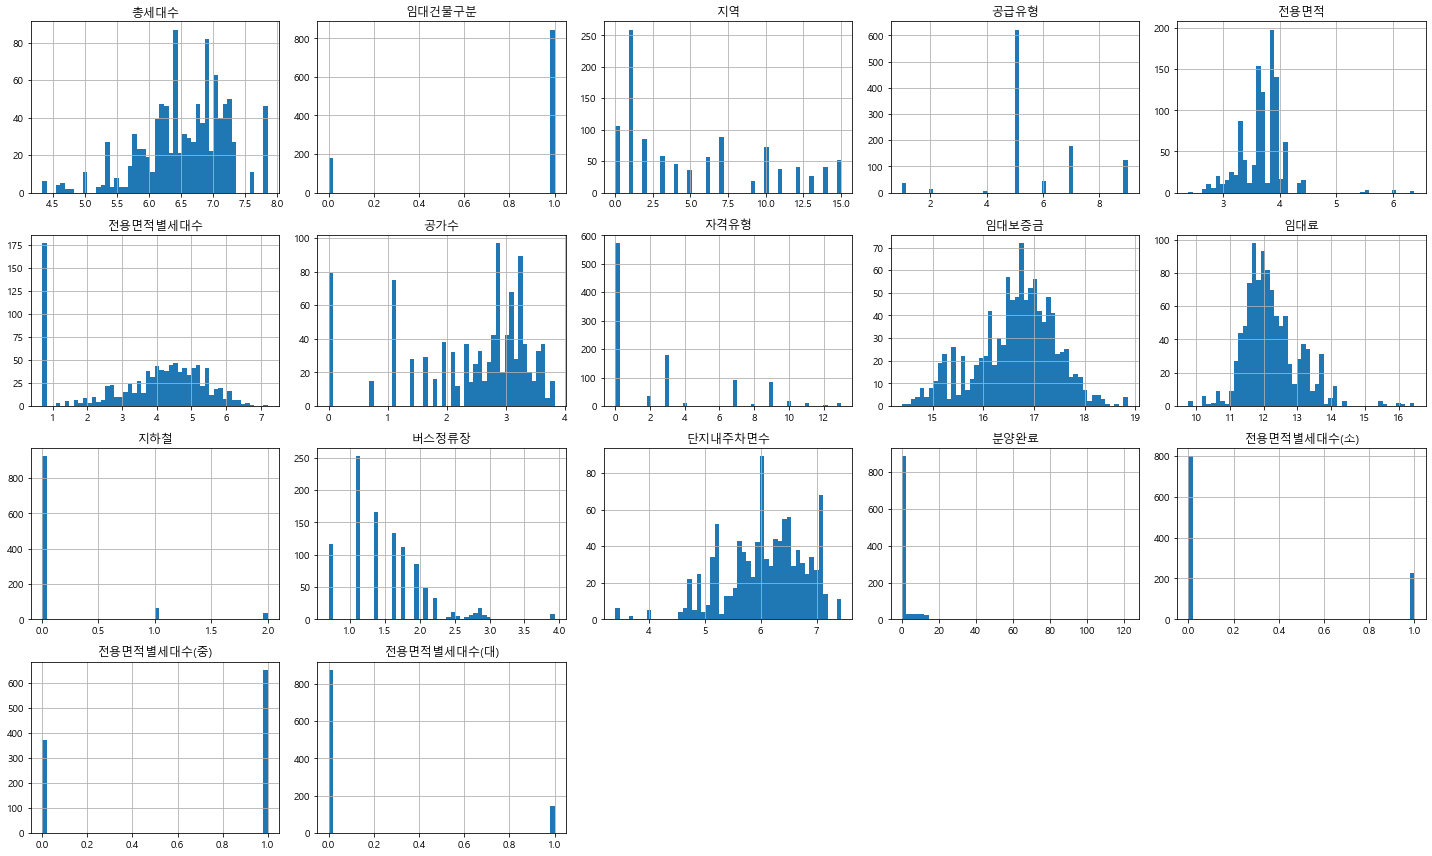

In [119]:
## test
columns = test.columns.drop('단지코드')

ax = [None for _ in range(len(columns))]
plt.figure(figsize=(20,12), facecolor='white')

for idx, col in enumerate(columns):
    ax[idx] = plt.subplot(4, 5, idx+1)
    plt.hist(test[col], bins=50)
    plt.title(col)
    plt.grid()

plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


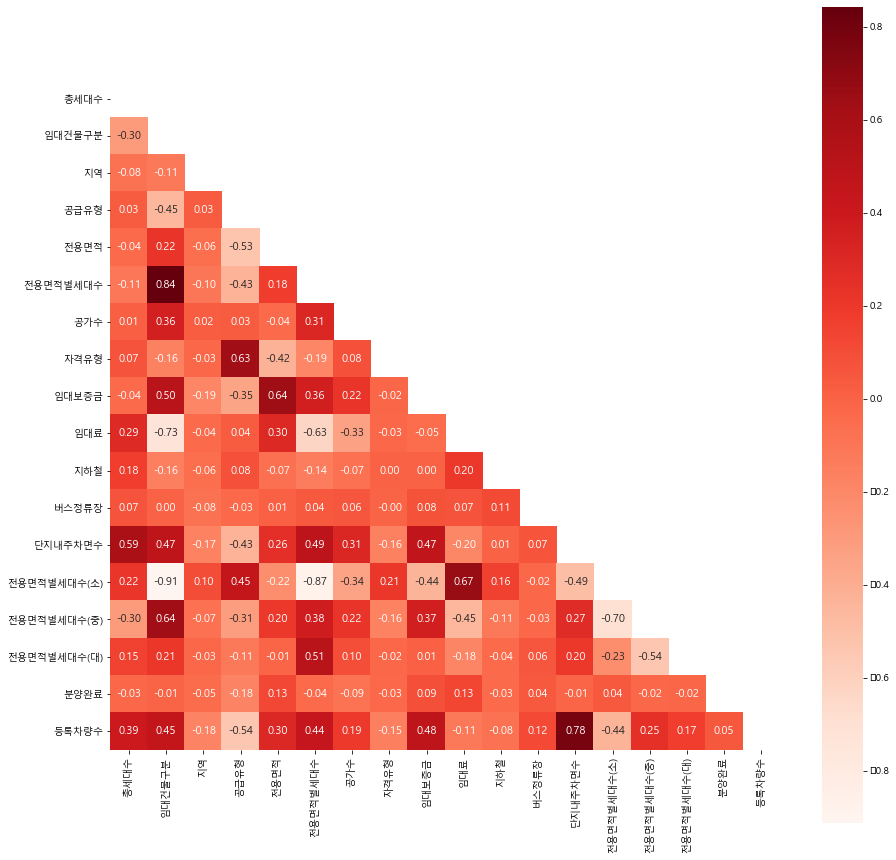

In [146]:
## train 상관계수
sel = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수',
       '공가수', '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', 
      '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)', '분양완료', '등록차량수']

plt.figure(figsize=(15,15), facecolor='white')

mask = np.zeros_like(train[sel].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(train[sel].corr(), mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.show()

#### 총 세대수, 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 임대보증금, 단지내주차면수, 전용면적별세대수(소), 전용면적별세대수(중)

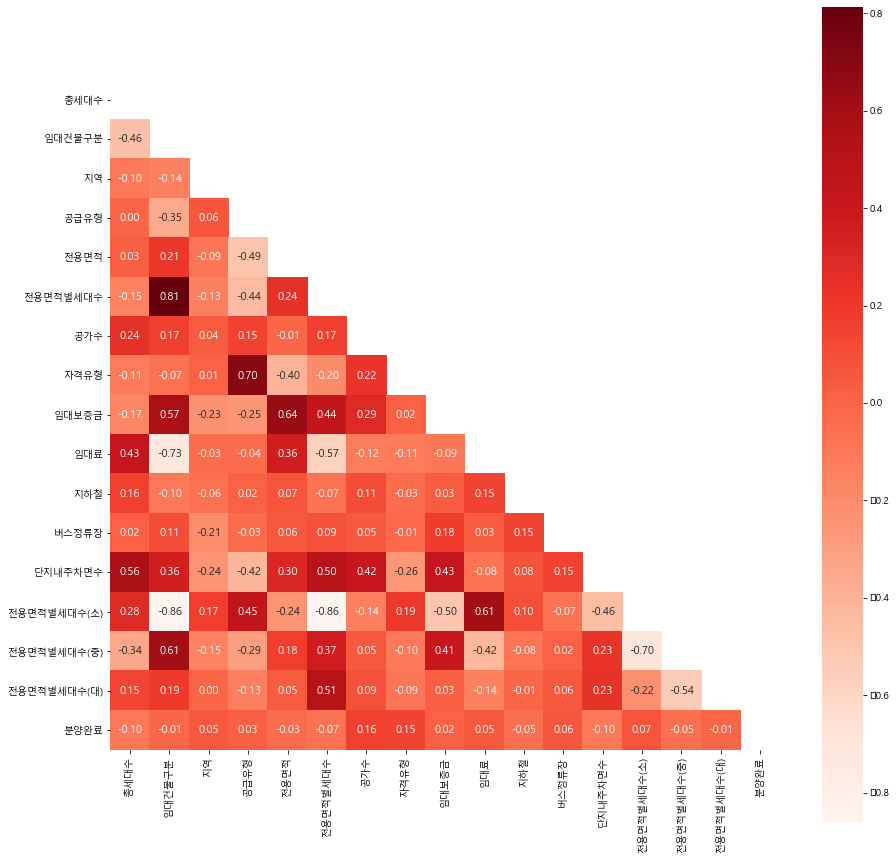

In [132]:
## test 상관계수
sel = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수',
       '공가수', '자격유형', '임대보증금', '임대료', '지하철', '버스정류장', '단지내주차면수', 
      '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)', '분양완료']

plt.figure(figsize=(15,15), facecolor='white')

mask = np.zeros_like(test[sel].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(test[sel].corr(), mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.show()

### 버스정류장이랑 지하철, 분양완료의 상관계수가 낮아서 삭제

In [130]:
train.describe()

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000
mean,6.622306,0.804113,5.695713,5.436389,3.730587,3.655430,2.259928,1.972813,16.679085,12.295055,0.168700,1.435203,6.139121,5.978037,4.304984,0.226908,0.623911,0.149181
std,0.605125,0.396951,4.778035,1.709931,0.365808,1.737521,0.960015,3.083444,0.763623,0.865694,0.419349,0.453809,0.756124,0.889808,32.861200,0.418906,0.484487,0.356329
min,3.295837,0.000000,0.000000,0.000000,2.611539,0.693147,0.000000,0.000000,14.405535,9.720226,0.000000,0.000000,2.639057,2.639057,0.000000,0.000000,0.000000,0.000000
25%,6.244167,1.000000,1.000000,5.000000,3.499533,2.708050,1.609438,0.000000,16.195335,11.695255,0.000000,1.098612,5.627621,5.347108,0.000000,0.000000,0.000000,0.000000
50%,6.654153,1.000000,5.000000,5.000000,3.709662,4.110874,2.484907,0.000000,16.705271,12.133561,0.000000,1.386294,6.216606,6.173786,0.000000,0.000000,1.000000,0.000000
75%,7.008505,1.000000,9.000000,7.000000,3.952205,4.962845,3.044522,3.000000,17.165099,12.804797,0.000000,1.609438,6.700731,6.635947,0.000000,0.000000,1.000000,0.000000
max,7.851272,1.000000,15.000000,9.000000,6.370586,7.531552,4.025352,14.000000,20.659582,16.465620,3.000000,3.044522,7.494986,7.844241,452.000000,1.000000,1.000000,1.000000


---

### 모델 학습

전체적으로 분포가 균일하기 때문에 우선 정규화를 시키지 않고 진행

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance

sel = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수',
       '공가수', '자격유형', '임대보증금', '임대료', '단지내주차면수', 
      '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)']

X = train[sel]
y = train['등록차량수']
test_X = test[sel]

n_features = X.shape[1]

for size in notebook.tqdm(range(10, 41, 5)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size/100, random_state=0)
    print('===========================================')
    for n in notebook.tqdm(range(100, 101)):
        model = RandomForestRegressor(n_estimators=n, random_state=0)
        model.fit(X_train, y_train)
        train_score = round(model.score(X_train, y_train), 3)
        test_score = round(model.score(X_test, y_test), 3)
        
        if test_score > 0.8:
            print(f'test_size : {size/100} , estimators : {n}')
            print(f'train score : {train_score}')
            print(f'test score : {test_score}')
            print()

test_size : 0.1 , estimators : 100
train score : 0.998
test score : 0.992




test_size : 0.15 , estimators : 100
train score : 0.998
test score : 0.99




test_size : 0.2 , estimators : 100
train score : 0.998
test score : 0.989




test_size : 0.25 , estimators : 100
train score : 0.997
test score : 0.988




test_size : 0.3 , estimators : 100
train score : 0.997
test score : 0.988




test_size : 0.35 , estimators : 100
train score : 0.996
test score : 0.985




test_size : 0.4 , estimators : 100
train score : 0.996
test score : 0.983





In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

sel = ['총세대수', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수',
       '임대보증금', '단지내주차면수', '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)']

X = train[sel]
y = train['등록차량수']
test_X = test[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(test_X)
pred

array([669.25, 621.99, 645.83, ..., 309.28, 302.12, 330.91])

In [148]:
def plot_feature_important_up(model, n_features, feature_names):
    imp = model.feature_importances_     # feature의 중요도
    
    plt.figure(figsize=(10,6), facecolor='white')
    plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    
    plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
    plt.xlabel("feature importance")   # x축 레이블(제목)
    plt.ylabel("feature")              # y축 제목
    plt.ylim(-1, n_features)           # y축의 범위 지정
    
    plt.show()

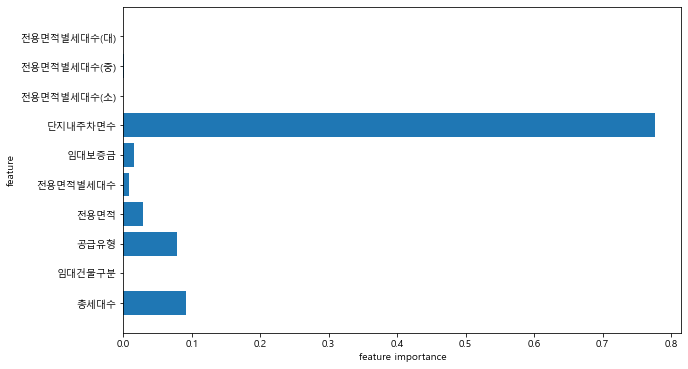

In [149]:
feature_names = sel

n_features = X.shape[1]
plot_feature_important_up(model, n_features, feature_names)

In [150]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(feature_names)
print(model.feature_importances_)

0.9963675751252378
0.975476928211523
['총세대수', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '임대보증금', '단지내주차면수', '전용면적별세대수(소)', '전용면적별세대수(중)', '전용면적별세대수(대)']
[9.21375690e-02 5.19569891e-05 7.88186149e-02 2.81366820e-02
 8.29690600e-03 1.56321332e-02 7.76279741e-01 1.06702486e-04
 3.08045661e-04 2.31648925e-04]


In [151]:
test_sub = test.copy()

test_sub['등록차량수'] = pred
test_sub['코드별차량수평균'] = test_sub.groupby('단지코드')['등록차량수'].transform(np.mean)
test_sub

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대),등록차량수,코드별차량수평균
0,C1072,6.626718,1,1,5,3.708437,4.762174,2.708050,7,16.943586,12.153942,0.0,1.098612,6.527958,0.0,0,1,0,669.25,640.637500
1,C1072,6.626718,1,1,5,3.867235,3.433987,2.708050,0,17.400362,12.428940,0.0,1.098612,6.527958,0.0,0,1,0,621.99,640.637500
2,C1072,6.626718,1,1,5,3.869116,4.727388,2.708050,7,17.400362,12.428940,0.0,1.098612,6.527958,0.0,0,1,0,645.83,640.637500
3,C1072,6.626718,1,1,5,3.869116,4.795791,2.708050,7,17.400362,12.428940,0.0,1.098612,6.527958,0.0,0,1,0,642.98,640.637500
4,C1072,6.626718,1,1,5,3.960051,4.110874,2.708050,7,17.588203,12.600750,0.0,1.098612,6.527958,0.0,0,1,0,631.79,640.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,6.516193,1,2,9,3.631515,4.844187,3.663562,11,16.677363,11.874273,0.0,0.693147,6.148468,5.0,0,1,0,487.07,497.866364
1018,C2189,5.948035,1,12,5,3.407511,4.574711,3.828641,7,15.742966,11.574970,0.0,1.098612,5.707110,4.0,0,1,0,312.66,313.742500
1019,C2189,5.948035,1,12,5,3.407511,3.044522,3.828641,7,15.742966,11.574970,0.0,1.098612,5.707110,4.0,0,1,0,309.28,313.742500
1020,C2189,5.948035,1,12,5,3.700067,5.313206,3.828641,7,16.411511,11.881734,0.0,1.098612,5.707110,4.0,0,0,1,302.12,313.742500


In [152]:
test_new = test_sub.drop_duplicates('단지코드', keep='first').reset_index()

sub_df = test_new[['단지코드', '코드별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df

,code,num
0,C1072,640.637500
1,C1128,965.623333
2,C1456,579.043333
3,C1840,529.500000
4,C1332,1087.426250
...,...,...
145,C2456,276.927500
146,C1266,527.150000
147,C2152,53.340000
148,C1267,497.866364


In [154]:
sub_df.to_csv('07_19_second_submit.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '07_17_first_submit.csv',
 '07_17_second_submit.csv',
 '07_17_third_submit.csv',
 '07_18_first_submit.csv',
 '07_18_second_submit.csv',
 '07_18_third_submit.csv',
 '07_19_first_submit.csv',
 '07_19_second_submit.csv',
 'CSV',
 'parking_data_preprocessing_test_07_17.csv',
 'parking_data_preprocessing_test_07_18.csv',
 'parking_data_preprocessing_test_07_19.csv',
 'parking_data_preprocessing_train_07_17.csv',
 'parking_data_preprocessing_train_07_18.csv',
 'parking_data_preprocessing_train_07_19.csv',
 'Parking_demand_07_12(1).ipynb',
 'Parking_demand_07_12(2).ipynb',
 'Parking_demand_07_14.ipynb',
 'Parking_demand_07_16.ipynb',
 'Parking_demand_07_17.ipynb',
 'Parking_demand_07_18.ipynb',
 'Parking_demand_07_19.ipynb',
 'Parking_demand_data_error.ipynb',
 'second_rf_0712.csv']

### 두번째 제출 : 129.4422점

In [169]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

sel = train.columns.drop(['등록차량수', '단지코드'])

X = train[sel]
y = train['등록차량수']
test_X = test[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

for rate1 in notebook.tqdm(range(100, 250, 10)):
    for rate2 in notebook.tqdm(range(29, 30, 1)):
        GBR = GradientBoostingRegressor(learning_rate=rate2/100, n_estimators=rate1, random_state=24)
        GBR.fit(X_train, y_train)
        pred = GBR.predict(X_test)
        
        error = mean_absolute_error(y_test, pred)
        
        train_score = round(GBR.score(X_train, y_train), 3)
        test_score = round(GBR.score(X_test, y_test), 3)
        
        if test_score > 0.8:
            print(f'[ learning_rate : {rate2/100} , estimators : {rate1} ]')
            print(train_score)
            print(test_score)
            print(error)
            print()

[ learning_rate : 0.29 , estimators : 100 ]
0.986
0.98
44.89899472890152




[ learning_rate : 0.29 , estimators : 110 ]
0.988
0.982
41.936830432230295




[ learning_rate : 0.29 , estimators : 120 ]
0.99
0.983
39.81971933337749




[ learning_rate : 0.29 , estimators : 130 ]
0.991
0.984
38.88721775694412




[ learning_rate : 0.29 , estimators : 140 ]
0.992
0.985
37.69872518669453




[ learning_rate : 0.29 , estimators : 150 ]
0.993
0.986
36.411949014324485




[ learning_rate : 0.29 , estimators : 160 ]
0.993
0.987
34.841869016082214




[ learning_rate : 0.29 , estimators : 170 ]
0.994
0.988
33.81205819815529




[ learning_rate : 0.29 , estimators : 180 ]
0.995
0.988
32.69798526053793




[ learning_rate : 0.29 , estimators : 190 ]
0.995
0.989
31.681741010349263




[ learning_rate : 0.29 , estimators : 200 ]
0.996
0.989
30.98020316856484




[ learning_rate : 0.29 , estimators : 210 ]
0.996
0.99
29.95239210973821




[ learning_rate : 0.29 , estimators : 220 ]
0.997
0.991
28.787829936962638




[ learning_rate : 0.29 , estimators : 230 ]
0.997
0.991
28.20989271089209




[ learning_rate : 0.29 , estimators : 240 ]
0.997
0.991
27.919052612368947





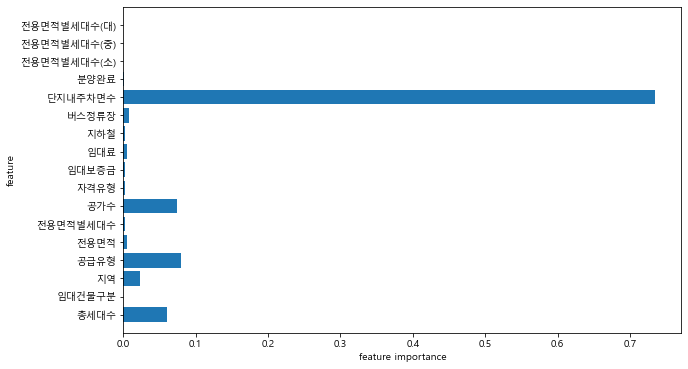

In [188]:
GBR = GradientBoostingRegressor(learning_rate=0.29, n_estimators=115, random_state=24)

GBR.fit(X_train, y_train)
pred = GBR.predict(test_X)

test['등록차량수'] = pred
# test

feature_names = sel

n_features = X.shape[1]
plot_feature_important_up(GBR, n_features, feature_names)

In [180]:
new_test = test.copy()

new_test['코드별차량수평균'] = test.groupby('단지코드')['등록차량수'].transform(np.mean)
new_test[new_test['단지코드']=='C2152']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대),등록차량수,코드별차량수평균
1005,C2152,4.795791,1,0,6,3.251537,4.204693,2.302585,2,15.149717,11.163268,0.0,0.693147,3.713572,0.0,0,1,0,5.795898,2.82514
1006,C2152,4.795791,1,0,6,3.550766,4.007333,2.302585,2,15.459308,11.472855,0.0,0.693147,3.713572,0.0,0,1,0,-0.145618,2.82514


In [179]:
new_df.columns = ['code', 'num']

new_df

,code,num
0,C1072,693.910544
1,C1128,1064.619162
2,C1456,452.332844
3,C1840,500.955884
4,C1332,957.442821
...,...,...
145,C2456,222.260183
146,C1266,398.731771
147,C2152,2.825140
148,C1267,365.522955


In [187]:
new_df.to_csv('07_19_third_submit.csv', index=False)

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '07_17_first_submit.csv',
 '07_17_second_submit.csv',
 '07_17_third_submit.csv',
 '07_18_first_submit.csv',
 '07_18_second_submit.csv',
 '07_18_third_submit.csv',
 '07_19_first_submit.csv',
 '07_19_second_submit.csv',
 '07_19_third_submit.csv',
 'CSV',
 'parking_data_preprocessing_test_07_17.csv',
 'parking_data_preprocessing_test_07_18.csv',
 'parking_data_preprocessing_test_07_19.csv',
 'parking_data_preprocessing_train_07_17.csv',
 'parking_data_preprocessing_train_07_18.csv',
 'parking_data_preprocessing_train_07_19.csv',
 'Parking_demand_07_12(1).ipynb',
 'Parking_demand_07_12(2).ipynb',
 'Parking_demand_07_14.ipynb',
 'Parking_demand_07_16.ipynb',
 'Parking_demand_07_17.ipynb',
 'Parking_demand_07_18.ipynb',
 'Parking_demand_07_19.ipynb',
 'Parking_demand_data_error.ipynb',
 'second_rf_0712.csv']

In [186]:
test[test['단지코드']=='']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스정류장,단지내주차면수,등록차량수,분양완료,전용면적별세대수(소),전용면적별세대수(중),전용면적별세대수(대)


### 세번째 시도 : 118.9232